In [1]:
import pickle

from keyrover import *
from keyrover.vision import device
from keyrover.math.bilinear import *

In [9]:
SIZE = (256, 256)

with open("../camera/camera_data.bin", "rb") as f:
    camera_data = pickle.load(f)

In [10]:
transform = InverseBilinear(1, width=640, height=480, device=device,
                            p1=KeyboardBottomLeft, p2=KeyboardBottomRight, p3=KeyboardTopRight, p4=KeyboardTopLeft)

(480.0, 0.0)

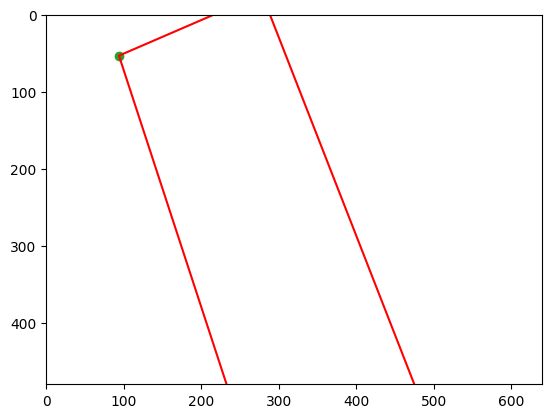

In [11]:
i = 0

corners = transform.project_corners(*camera_data["rotation"][i], camera_data["location"][i])
    
a, b, c, d = map(lambda t: t.cpu(), corners)
plt.scatter(*a)
plt.scatter(*b)
plt.scatter(*c)
plt.scatter(*d)

quad = np.array([a, b, c, d, a]).T[0]
plt.plot(*quad, 'r-')
plt.xlim(0, 640)
plt.ylim(480, 0)

In [27]:
locations = np.array(camera_data["location"])
rotations = np.array(camera_data["rotation"])

transform = InverseBilinear(len(rotations), width=640, height=480, device=device,
                            p1=KeyboardBottomLeft, p2=KeyboardBottomRight, p3=KeyboardTopRight, p4=KeyboardTopLeft)

corners = transform.project_corners(*rotations.T, locations)
corners = np.array(tuple(map(lambda t: t.cpu().numpy(), corners)))
corners = np.vstack(corners).T

mean = corners.mean(axis=0, keepdims=True)
std = corners.std(axis=0, keepdims=True)

corners = (corners - mean) / std
corners

array([[ 1.3669528 ,  0.949996  , -0.8362211 , ..., -0.39182132,
         0.5835733 ,  1.7255849 ],
       [-0.8514375 , -0.5603866 , -0.5522717 , ..., -0.05313418,
        -0.5931126 , -0.657822  ],
       [ 1.2331941 ,  0.8547654 , -0.648942  , ..., -1.1288202 ,
         0.16909283,  1.4983519 ],
       ...,
       [-0.5921286 , -0.9557646 ,  0.20342731, ...,  0.76514775,
         0.06436521, -1.1506649 ],
       [ 2.0389931 , -1.2158941 , -1.2746217 , ...,  0.9392376 ,
         2.3852952 , -0.13231356],
       [ 0.5460479 ,  1.0198425 , -0.12842076, ..., -0.58120584,
        -0.20502478,  1.1710469 ]], dtype=float32)

In [28]:
mean, std

(array([[121.72794, 304.1805 , 521.90515, 321.1944 , 518.2518 , 182.48584,
         135.06981, 166.04904]], dtype=float32),
 array([[295.45062, 322.00687, 291.2603 , 333.85397, 291.20776, 329.91974,
         298.2404 , 317.72784]], dtype=float32))

In [29]:
with open("corners.pkl", "wb") as f:
    pickle.dump(corners, f)